In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [2]:
sales=pd.read_excel(r'C:\2 NIT\data\piza model\Data Model - Pizza Sales.xlsx')

In [3]:
sales.shape

(48620, 12)

In [4]:
sales.columns

Index(['order_details_id', 'order_id', 'pizza_id', 'quantity', 'order_date',
       'order_time', 'unit_price', 'total_price', 'pizza_size',
       'pizza_category', 'pizza_ingredients', 'pizza_name'],
      dtype='object')

In [5]:
sales.sample(3)

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
39136,39137,17251,ckn_alfredo_m,1,2015-10-20,17:42:03,16.75,16.75,M,Chicken,"Chicken, Red Onions, Red Peppers, Mushrooms, A...",The Chicken Alfredo Pizza
42984,42985,18895,hawaiian_l,1,2015-11-19,13:19:13,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
29913,29914,13212,hawaiian_l,1,2015-08-08,21:22:11,16.50,16.50,L,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza


In [6]:
sales.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48620 entries, 0 to 48619
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   order_details_id   48620 non-null  int64         
 1   order_id           48620 non-null  int64         
 2   pizza_id           48620 non-null  object        
 3   quantity           48620 non-null  int64         
 4   order_date         48620 non-null  datetime64[ns]
 5   order_time         48620 non-null  object        
 6   unit_price         48620 non-null  float64       
 7   total_price        48620 non-null  float64       
 8   pizza_size         48620 non-null  object        
 9   pizza_category     48620 non-null  object        
 10  pizza_ingredients  48620 non-null  object        
 11  pizza_name         48620 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(3), object(6)
memory usage: 4.5+ MB


In [7]:
sales.isnull()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...
48615,False,False,False,False,False,False,False,False,False,False,False,False
48616,False,False,False,False,False,False,False,False,False,False,False,False
48617,False,False,False,False,False,False,False,False,False,False,False,False
48618,False,False,False,False,False,False,False,False,False,False,False,False


In [8]:
sales.isnull().sum()

order_details_id     0
order_id             0
pizza_id             0
quantity             0
order_date           0
order_time           0
unit_price           0
total_price          0
pizza_size           0
pizza_category       0
pizza_ingredients    0
pizza_name           0
dtype: int64

In [9]:
sales.duplicated().sum()

0

In [10]:
sales.describe()

,order_details_id,order_id,quantity,unit_price,total_price
count,48620.000000,48620.000000,48620.000000,48620.000000,48620.000000
mean,24310.500000,10701.479761,1.019622,16.494132,16.821474
std,14035.529381,6180.119770,0.143077,3.621789,4.437398
min,1.000000,1.000000,1.000000,9.750000,9.750000
25%,12155.750000,5337.000000,1.000000,12.750000,12.750000
50%,24310.500000,10682.500000,1.000000,16.500000,16.500000
75%,36465.250000,16100.000000,1.000000,20.250000,20.500000
max,48620.000000,21350.000000,4.000000,35.950000,83.000000


In [11]:
total_revenue = (sales['total_price']).sum()
print("Total Revenue:",total_revenue)

Total Revenue: 817860.05


In [12]:
sales.head()

,order_details_id,order_id,pizza_id,quantity,order_date,order_time,unit_price,total_price,pizza_size,pizza_category,pizza_ingredients,pizza_name
0,1,1,hawaiian_m,1,2015-01-01,11:38:36,13.25,13.25,M,Classic,"Sliced Ham, Pineapple, Mozzarella Cheese",The Hawaiian Pizza
1,2,2,classic_dlx_m,1,2015-01-01,11:57:40,16.00,16.00,M,Classic,"Pepperoni, Mushrooms, Red Onions, Red Peppers,...",The Classic Deluxe Pizza
2,3,2,five_cheese_l,1,2015-01-01,11:57:40,18.50,18.50,L,Veggie,"Mozzarella Cheese, Provolone Cheese, Smoked Go...",The Five Cheese Pizza
3,4,2,ital_supr_l,1,2015-01-01,11:57:40,20.75,20.75,L,Supreme,"Calabrese Salami, Capocollo, Tomatoes, Red Oni...",The Italian Supreme Pizza
4,5,2,mexicana_m,1,2015-01-01,11:57:40,16.00,16.00,M,Veggie,"Tomatoes, Red Peppers, Jalapeno Peppers, Red O...",The Mexicana Pizza


In [13]:
avg_order_value = sales.groupby('order_id')['total_price'].sum().mean()
print("Average Order Value:",avg_order_value)

Average Order Value: 38.30726229508196


In [14]:
total_pizzas_sold = sales['quantity'].sum()
print("Total Pizzas Sold:",total_pizzas_sold)

Total Pizzas Sold: 49574


In [15]:
total_orders = len(sales.groupby('order_id').count())
print("Total Orders:",total_orders)

Total Orders: 21350


In [16]:
avg_pizzas_per_order = sales['quantity'].sum()/total_orders
print("Average Pizzas per Order:",avg_pizzas_per_order)

Average Pizzas per Order: 2.321967213114754


What is the average unit price and revenue of pizza across different categories?

In [17]:
category_analysis = sales.groupby('pizza_category').agg(average_unit_price=('unit_price', 'mean'), revenue_per_category=('unit_price', lambda x: (x * sales['quantity']).sum())).sort_values(by='revenue_per_category', ascending=False)
print("Average Unit Price and Revenue by Category:\n",category_analysis)

Average Unit Price and Revenue by Category:
                 average_unit_price  revenue_per_category
pizza_category                                          
Classic                  14.797490             220053.10
Supreme                  17.363229             208197.00
Chicken                  17.709408             195919.50
Veggie                   16.612639             193690.45


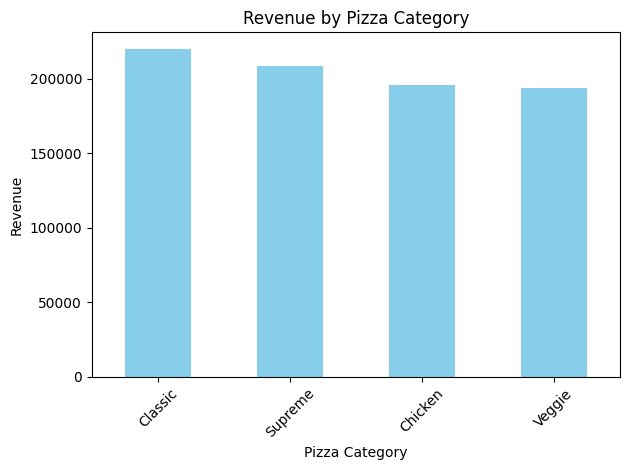

In [18]:
category_analysis['revenue_per_category'].plot(kind='bar',color='skyblue')
plt.xlabel('Pizza Category')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Category')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the average unit price and revenue of pizza across different sizes?

In [19]:
size_analysis = sales.groupby('pizza_size').agg(average_unit_price=('unit_price', 'mean'),revenue_per_size=('unit_price', lambda x: (x * sales['quantity']).sum())).sort_values(by='revenue_per_size', ascending=False)
print("Average Unit Price and Revenue by size:\n",size_analysis)

Average Unit Price and Revenue by size:
             average_unit_price  revenue_per_size
pizza_size                                      
L                    19.802553         375318.70
M                    15.951219         249382.25
S                    12.364328         178076.50
XL                   25.500000          14076.00
XXL                  35.950000           1006.60


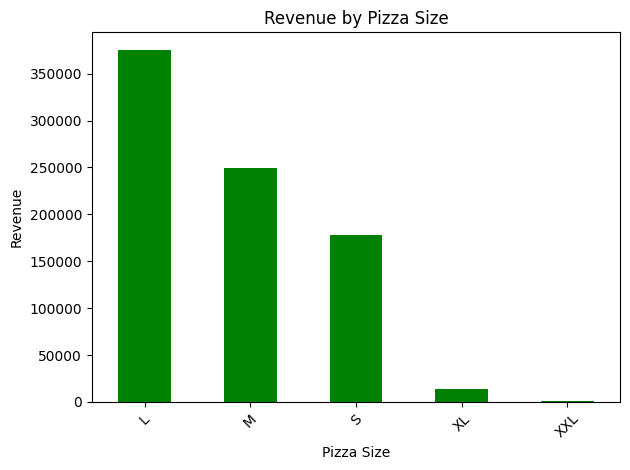

In [20]:
size_analysis['revenue_per_size'].plot(kind='bar',color='green')
plt.xlabel('Pizza Size')
plt.ylabel('Revenue')
plt.title('Revenue by Pizza Size')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

What is the average unit price and revenue of most sold 3 pizzas?

In [21]:
top_pizza_analysis = sales.groupby('pizza_name').agg(average_unit_price=('unit_price','mean'),revenue_per_pizza=('unit_price', lambda x: (x * sales['quantity']).sum())).nlargest(5, 'revenue_per_pizza')
print("Average Unit Price and Revenue of Top 3 Pizzas:\n",top_pizza_analysis)

Average Unit Price and Revenue of Top 3 Pizzas:
                               average_unit_price  revenue_per_pizza
pizza_name                                                         
The Thai Chicken Pizza                 18.286069           43434.25
The Barbecue Chicken Pizza             17.572934           42768.00
The California Chicken Pizza           17.448523           41409.50
The Classic Deluxe Pizza               15.575952           38180.50
The Spicy Italian Pizza                18.104663           34831.25


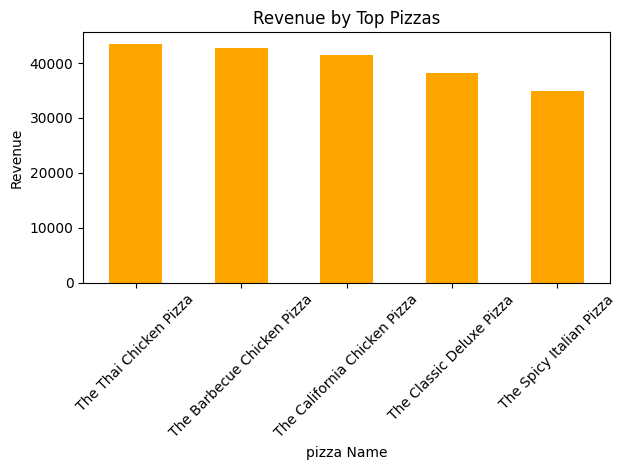

In [22]:
top_pizza_analysis['revenue_per_pizza'].plot(kind='bar',color='orange')
plt.xlabel('pizza Name')
plt.ylabel('Revenue')
plt.title('Revenue by Top Pizzas')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# SEASONAL ANALYSIS

Which days of the week have the highest number of orders?

In [23]:
sales['day_of_week'] = pd.to_datetime(sales['order_date']).dt.strftime('%A')
day_of_week_analysis = sales.groupby('day_of_week')['order_id'].count().sort_values(ascending=False)
print("Highest Number of Orders by Day of Week:\n", day_of_week_analysis)

Highest Number of Orders by Day of Week:
 day_of_week
Friday       8106
Saturday     7355
Thursday     7323
Wednesday    6797
Tuesday      6753
Monday       6369
Sunday       5917
Name: order_id, dtype: int64


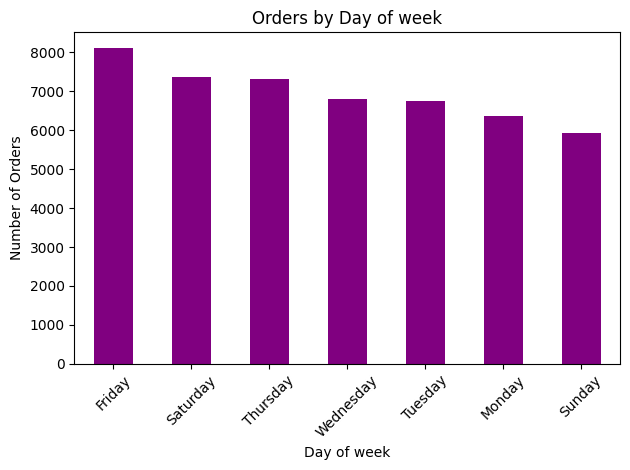

In [24]:
day_of_week_analysis.plot(kind='bar',color='purple')
plt.xlabel('Day of week')
plt.ylabel('Number of Orders')
plt.title('Orders by Day of week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [25]:
sales['delivery_time']=sales['order_time'].astype('string').str.slice(0,5)
delivery_time_analysis=sales.groupby('delivery_time')['order_id'].count().nlargest(5)
print("Most Occurring Order Times:\n",delivery_time_analysis)

Most Occurring Order Times:
 delivery_time
13:04    198
12:39    158
12:56    155
12:30    153
12:29    149
Name: order_id, dtype: int64


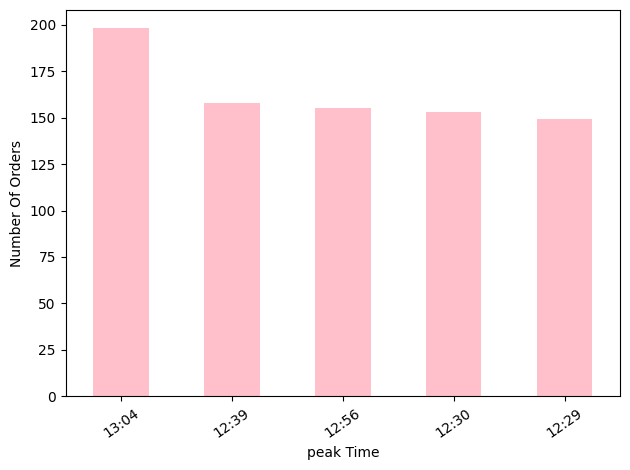

In [26]:
delivery_time_analysis.plot(kind='bar',color='pink')
plt.xlabel('peak Time')
plt.ylabel('Number Of Orders')
plt.xticks(rotation=35)
plt.tight_layout()
plt.show()

which month has the highest revenue

In [28]:
month_revenue_analysis = sales.groupby(pd.to_datetime(sales['order_date']).dt.strftime('%B'))['total_price'].sum()
print("Highest revenue month:\n",month_revenue_analysis)

Highest revenue month:
 order_date
April        68736.80
August       68278.25
December     64701.15
February     65159.60
January      69793.30
July         72557.90
June         68230.20
March        70397.10
May          71402.75
November     70395.35
October      64027.60
September    64180.05
Name: total_price, dtype: float64


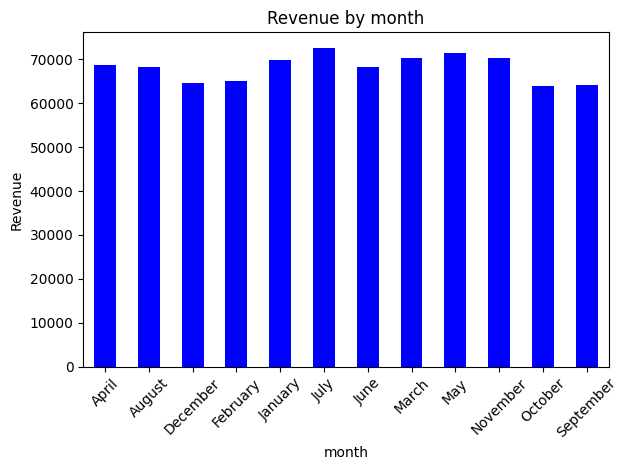

In [29]:
month_revenue_analysis.plot(kind='bar',color='blue')
plt.xlabel('month')
plt.ylabel('Revenue')
plt.title('Revenue by month')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

which season has the highest revenue

In [32]:
def categorize_season(month):
    if month in ['March', 'April', 'May']:
        return 'spring'
    elif month in ['June', 'July', 'August']:
        return 'Summer'
    elif month in ['September', 'October', 'November']:
        return 'fall'
    else:
        return 'winter'

In [33]:
sales['season']=pd.to_datetime(sales['order_date']).dt.strftime('%B').map(categorize_season)
seasonal_revenue_analysis=sales.groupby('season')['total_price'].sum()
print("Season with the Highest revenue:\n",seasonal_revenue_analysis)

Season with the Highest revenue:
 season
Summer    209066.35
fall      198603.00
spring    210536.65
winter    199654.05
Name: total_price, dtype: float64


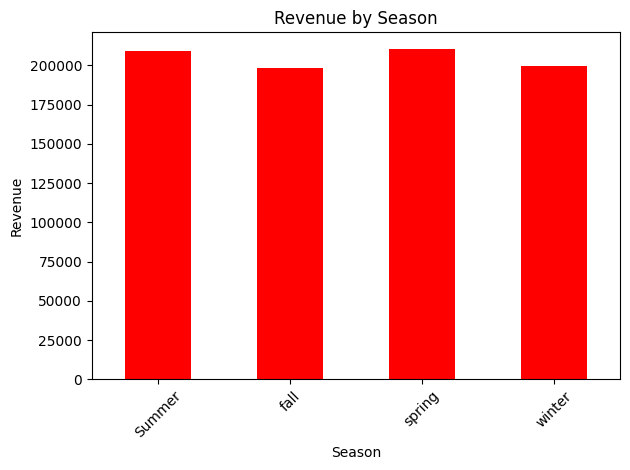

In [35]:
seasonal_revenue_analysis.plot(kind='bar',color='red')
plt.xlabel('Season')
plt.ylabel('Revenue')
plt.title('Revenue by Season')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# #customer behaviour analysis

which is the favorite pizza of customers(most ordered pizza)

In [38]:
favorite_pizza = sales.groupby(['pizza_name', 'pizza_size'])['order_id'].count().idxmax()
print("Favorite pizza:",favorite_pizza)

Favorite pizza: ('The Big Meat Pizza', 'S')


In [39]:
most_ordered_pizza = sales.groupby('pizza_name').agg(order_count=('order_id','count'),average_unit_price=('unit_price','mean')).nlargest(3,'order_count')
print("most ordered pizzas:\n",most_ordered_pizza)

most ordered pizzas:
                             order_count  average_unit_price
pizza_name                                                 
The Classic Deluxe Pizza           2416           15.575952
The Barbecue Chicken Pizza         2372           17.572934
The Hawaiian Pizza                 2370           13.317194


which pizza size is preferred by customers

In [44]:
preferred_pizza_size = sales.groupby('pizza_size').agg(order_count=('order_id','count'),average_unit_price=('unit_price','mean')).nlargest(1,'order_count')
print("preferred pizza size:\n",preferred_pizza_size)

preferred pizza size:
             order_count  average_unit_price
pizza_size                                 
L                 18526           19.802553


Which pizza category is preferred by customers?

In [42]:
preferred_pizza_category = sales.groupby('pizza_category').agg(
    order_count=('order_id', 'count'),
    average_unit_price=('unit_price', 'mean')
).nlargest(1, 'order_count')
print("Preferred Pizza Category:\n", preferred_pizza_category)

Preferred Pizza Category:
                 order_count  average_unit_price
pizza_category                                 
Classic               14579            14.79749


# PIZZA  ANALYSIS

pizza with least price

In [45]:
lowest_priced_pizza = sales[['pizza_name','unit_price']].sort_values(by='unit_price').iloc[0]
print("Lowest Priced pizza:\n",lowest_priced_pizza)

Lowest Priced pizza:
 pizza_name    The Pepperoni Pizza
unit_price                   9.75
Name: 7636, dtype: object


pizza with highest price

In [46]:
highest_priced_pizza= sales[['pizza_name','unit_price']].sort_values(by='unit_price',ascending=False).iloc[0]
print("Highest priced pizza:\n",highest_priced_pizza)

Highest priced pizza:
 pizza_name    The Greek Pizza
unit_price              35.95
Name: 22903, dtype: object


Number of pizza per category

In [52]:
pizza_per_category = sales['pizza_category'].value_counts()
print("Number of pizzaa per category:\n",pizza_per_category)

Number of pizzaa per category:
 Classic    14579
Supreme    11777
Veggie     11449
Chicken    10815
Name: pizza_category, dtype: int64


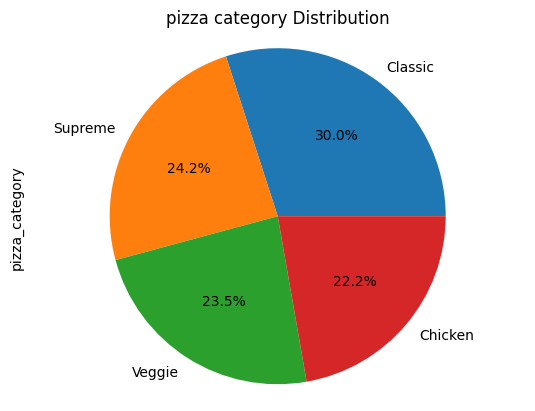

In [57]:
pizza_per_category.plot(kind='pie',autopct='%1.1f%%')
plt.title('pizza category Distribution')
plt.axis('equal')
plt.show()

Number of pizzas per pizza_size

In [58]:
pizzas_per_size = sales['pizza_size'].value_counts()
print("Number of pizzas per size:\n",pizzas_per_size)

Number of pizzas per size:
 L      18526
M      15385
S      14137
XL       544
XXL       28
Name: pizza_size, dtype: int64


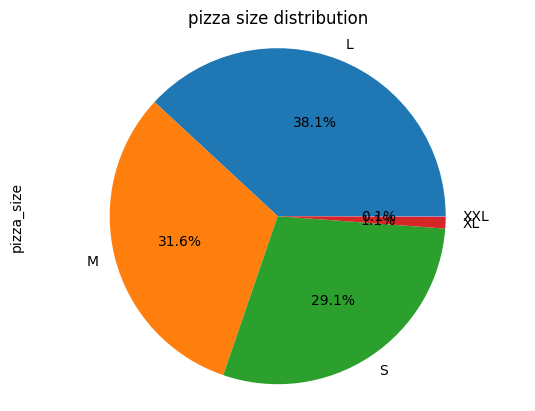

In [59]:
pizzas_per_size.plot(kind='pie',autopct='%1.1f%%')
plt.title('pizza size distribution')
plt.axis('equal')
plt.show()

pizzas with more than one category

In [60]:
pizzas_with_multiple_categories = sales.groupby('pizza_name').filter(lambda x: x['pizza_category'].nunique()>1)
print("pizzas with more than one category:\n",pizzas_with_multiple_categories)

pizzas with more than one category:
 Empty DataFrame
Columns: [order_details_id, order_id, pizza_id, quantity, order_date, order_time, unit_price, total_price, pizza_size, pizza_category, pizza_ingredients, pizza_name, day_of_week, delivery_time, season]
Index: []
